In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('pizza_customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Making constants for the column names
custid = 'CustomerID'
gender = 'Gender'
age = 'Age'
age_bin = 'Age bin'
annual_income = 'Annual Income (k$)'
spending_score = 'Spending Score (1-100)'
clusters = 'clusters'

In [3]:
data[[age, annual_income, spending_score]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


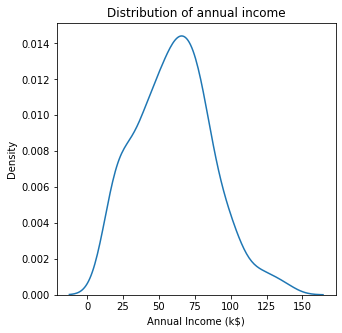

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(data = data, x=annual_income, ax = ax)
ax.set_title('Distribution of annual income')
plt.show()

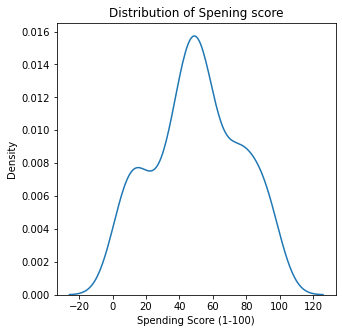

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(data = data, x=spending_score, ax = ax)
ax.set_title('Distribution of Spening score')
plt.show()

From this we can see that many young people, in the range of (20-40), prefer pizza. The distribution is left skewed

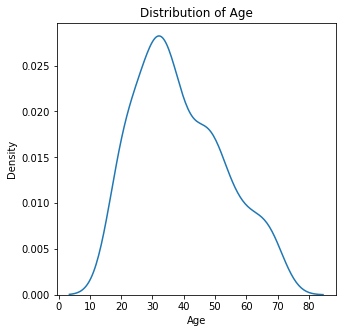

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(data = data, x=age, ax = ax)
ax.set_title('Distribution of Age')
plt.show()

In [7]:
# Age Binning
labels = [i for i in range(5)]
data[age_bin] = pd.cut(data[age], bins=5, labels=labels)
data[age_bin] = pd.cut(data[age], bins=5)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age bin
0,1,Male,19,15,39,"(17.948, 28.4]"
1,2,Male,21,15,81,"(17.948, 28.4]"
2,3,Female,20,16,6,"(17.948, 28.4]"
3,4,Female,23,16,77,"(17.948, 28.4]"
4,5,Female,31,17,40,"(28.4, 38.8]"


In [8]:
pd.cut(data[age], bins=5).unique

<bound method Series.unique of 0      (17.948, 28.4]
1      (17.948, 28.4]
2      (17.948, 28.4]
3      (17.948, 28.4]
4        (28.4, 38.8]
            ...      
195      (28.4, 38.8]
196      (38.8, 49.2]
197      (28.4, 38.8]
198      (28.4, 38.8]
199      (28.4, 38.8]
Name: Age, Length: 200, dtype: category
Categories (5, interval[float64, right]): [(17.948, 28.4] < (28.4, 38.8] < (38.8, 49.2] < (49.2, 59.6] < (59.6, 70.0]]>

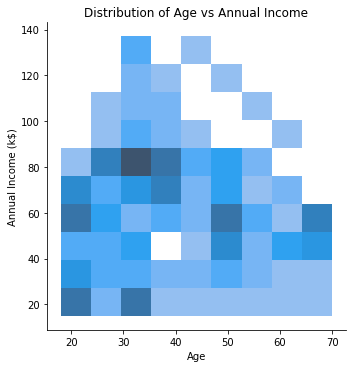

In [9]:
# fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.displot(data = data, x=age, y=annual_income)
plt.title("Distribution of Age vs Annual Income")
plt.show()

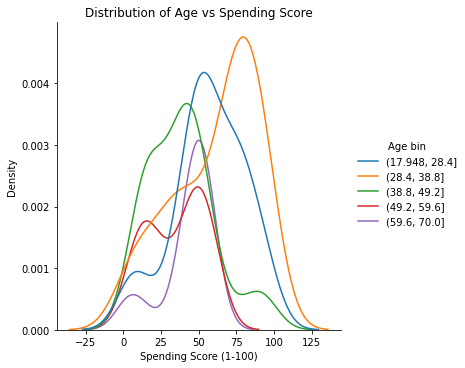

In [10]:
sns.displot(data = data, x=spending_score, hue=age_bin, kind='kde')
plt.title("Distribution of Age vs Spending Score")
plt.show()

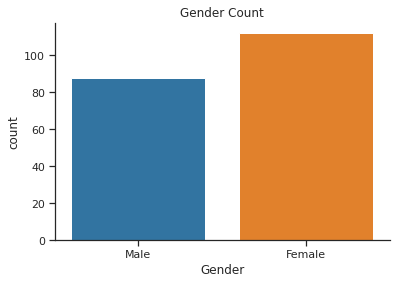

In [11]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='tab10')
sns.countplot(data = data, x=gender)
plt.title("Gender Count")
plt.show()

In [17]:
from random import randint, seed
from pprint import pprint
import numpy as np
class kmeans:
    def __init__(self, clusters, random_seed = -1, n_iter = 100):
        self._n_clusters = int(clusters)
        self._random_seed = random_seed
        self._n_iter = int(n_iter)
    
    def fit(self, data: np.ndarray):
        # Initialise the centroids
        self._start_points(data)
        
        # Put all the points in cluster 0
        self._clusters = np.zeros(data.shape[0])
        
        isUnchanged = False
        count = 1
        while (isUnchanged or count<self._n_iter):
            self._prev_clusters = np.copy(self._clusters)
            
            self._clusters = self._find_closest_centroids(data)

            for k in range(self._n_clusters):
                indices = np.where(self._clusters == k)[0]
                self._update_centroid(data[indices], k)
            count+=1
            
    def predict(self, data: np.ndarray):
        return self._find_closest_centroids(data)
    
    def get_centroids(self):
        return self._centroids
    
    def fit_predict(self, data: pd.DataFrame):
        self.fit(data)
        return self.predict(data)
        
    
    def _start_points(self, data: np.ndarray):
        self._centroids = np.array([]).reshape(data.shape[1],0)
        if (self._random_seed >= 0):
            seed(self._random_seed)
        self._centroid_indices = [randint(0, data.shape[0] - 1) for _ in range(self._n_clusters)]
        for i in range(self._n_clusters):
            self._centroids = np.c_[self._centroids, data[self._centroid_indices[i]]]
            
    def _find_closest_centroids(self, data: np.ndarray):
        distance = np.array([]).reshape(data.shape[0], 0)
        for k in range(self._n_clusters):
            tempDistance = np.sum((data - self._centroids[:,k])**2, axis=1)
            distance = np.c_[distance, tempDistance]
        close_centroid_indices = np.argmin(distance,axis=1)
        return close_centroid_indices
    
    def _update_centroid(self, data: np.ndarray, centroid_index: int):
        self._centroids[:, centroid_index] = np.mean(data, axis = 0)
    

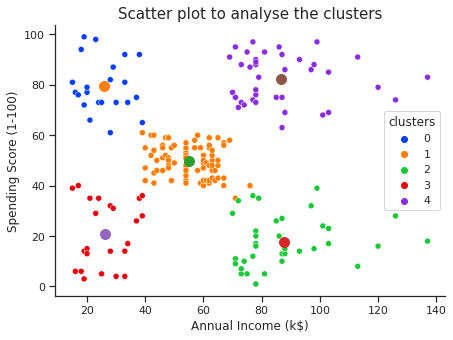

In [18]:
# Custom kmeans
k = kmeans(clusters=5)

data[clusters] = k.fit_predict(data[[annual_income, spending_score]].values)
centroids = k.get_centroids().T

fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(data=data, x=annual_income, y=spending_score, hue=clusters, palette="bright", ax = ax)
ax.set_title('Scatter plot to analyse the clusters', fontsize=15)
for i in range(5):
    ax.scatter(centroids[i,0], centroids[i,1], s=100)
plt.show()

## Cluster analysis
We can see that there are 5 types of clusters.
1. Low income / Low Spending `lils`
2. Low income / High Spending `lihs`
3. Mid income / Mid Spending `mims`
4. High income / Low Spending `hils`
5. High income / High Spending `hihs`

The **"Low Spending"** customers are not much use to us they are may not be willing to use the offers. But during simulations if we notice that such customers are frequent visitors, then we can give such customers more offers to increase their spending score.

"High spending" score is the target score audience while "Mid Spending" is the category where offers may be given randomly or based on visit frequency.

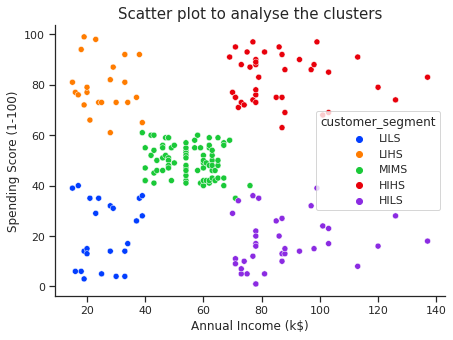

In [22]:
# Let's put the analysed segments as the cluster_names
customer_segments = {
    'lils': 'LILS', # Low income / Low spending
    'lihs': 'LIHS', # Low income / High Spending
    'mims': 'MIMS', # Mid income / Mid Spending
    'hils': 'HILS', # High income / Low Spending
    'hihs': 'HIHS'  # High income / High Spending
}

customer_segment = 'customer_segment'
data[customer_segment] = 'None'


data.loc[data[clusters] == 0, customer_segment] = customer_segments['lihs']
data.loc[data[clusters] == 1, customer_segment] = customer_segments['mims']
data.loc[data[clusters] == 2, customer_segment] = customer_segments['hils']
data.loc[data[clusters] == 3, customer_segment] = customer_segments['lils']
data.loc[data[clusters] == 4, customer_segment] = customer_segments['hihs']

fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(data=data, x=annual_income, y=spending_score, hue=customer_segment, palette="bright", ax = ax)
ax.set_title('Scatter plot to analyse the clusters', fontsize=15)
plt.show()


In [15]:
# Let's store this data in a csv file to catalyse the simulation
data.drop(age_bin, axis=1).to_csv('pizza_customers_segmented.csv')